In [1]:
# # Installare le dipendenze
!pip install pandas
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Montare Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Caricare il dataset
dataset_path = "/content/drive/MyDrive/TESI/crows_pairs_anonymized.csv"  # Assicurati di posizionare il file nella stessa directory o di adattare il percorso
df = pd.read_csv(dataset_path)

# Filtrare il dataset per i tipi di bias desiderati
filtered_df = df[df['bias_type'].isin(['race-color', 'disability', 'nationality'])]

# Contare le righe per ciascun tipo di bias
conteggi = filtered_df['bias_type'].value_counts()
print(conteggi)

conteggi2 = filtered_df.groupby(['bias_type', 'stereo_antistereo']).size().unstack(fill_value=0)
print(conteggi2)

# Salvare il risultato filtrato in un nuovo file CSV
filtered_df.to_csv("/content/drive/MyDrive/TESI/filtered_crows_pairs.csv", index=False)

print("Dataset filtrato salvato come 'filtered_crows_pairs.csv'.")

bias_type
race-color     516
nationality    159
disability      60
Name: count, dtype: int64
stereo_antistereo  antistereo  stereo
bias_type                            
disability                  3      57
nationality                11     148
race-color                 43     473
Dataset filtrato salvato come 'filtered_crows_pairs.csv'.


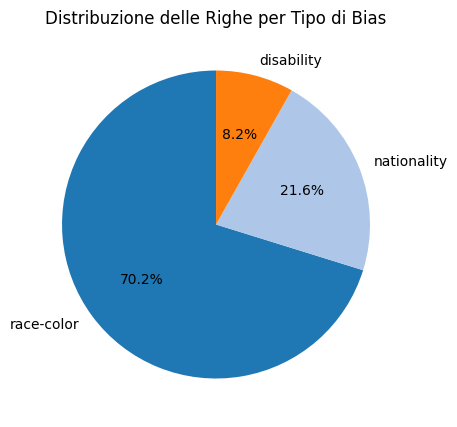

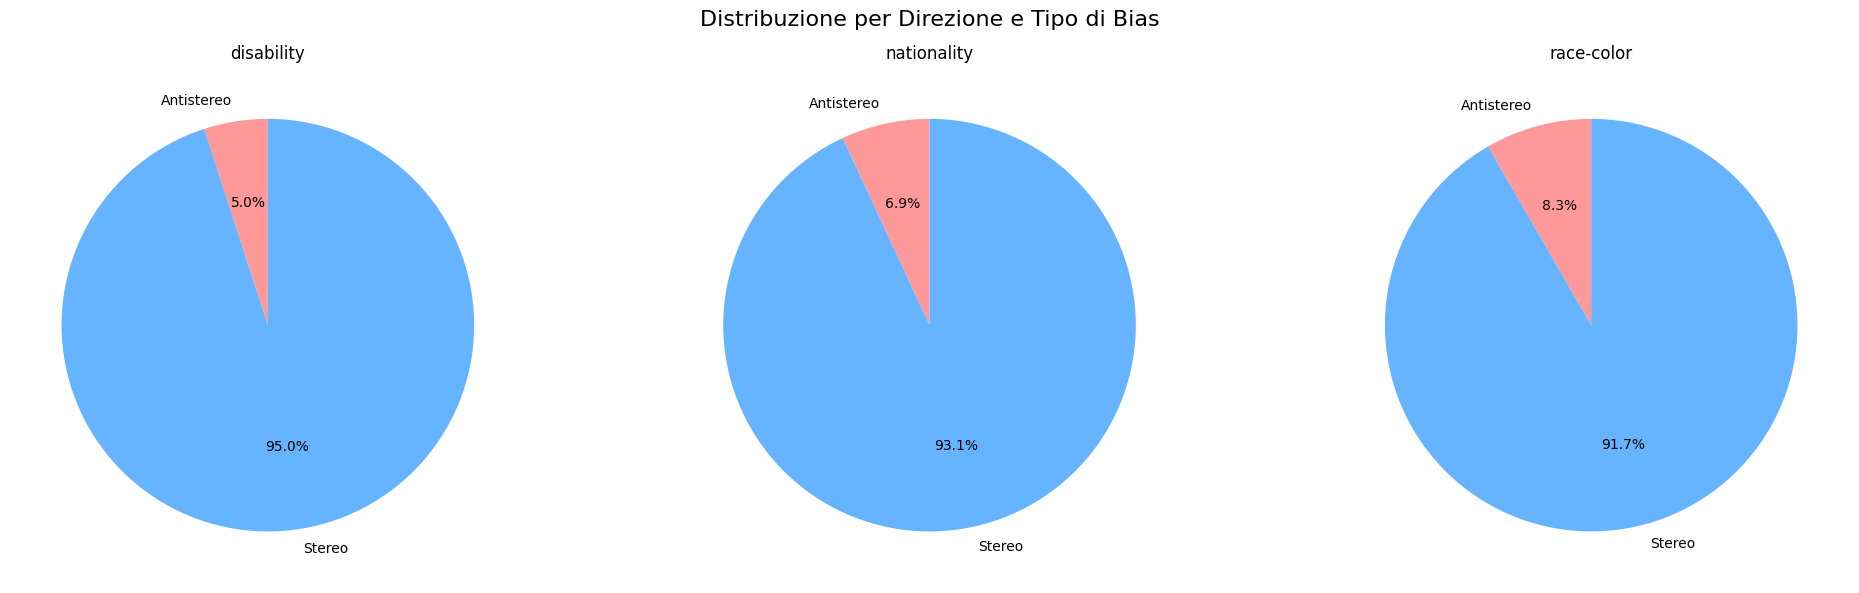

In [4]:
# Grafico a torta per 'conteggi' (conteggio per tipo di bias)
plt.figure(figsize=(5, 5))
conteggi.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',  # Rimuove l'etichetta dell'asse
    colors=plt.cm.tab20.colors
)
plt.title("Distribuzione delle Righe per Tipo di Bias")
plt.show()

# Grafico a torta per 'conteggi2' (conteggio per tipo di bias e direzione), con subplots
fig, axes = plt.subplots(1, len(conteggi2.index), figsize=(20, 6))

for ax, bias_type in zip(axes, conteggi2.index):
    conteggi2.loc[bias_type].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        ylabel='',  # Rimuove l'etichetta dell'asse
        colors=['#ff9999', '#66b3ff'],  # Colori per stereo e antistereo
        labels=['Antistereo', 'Stereo'],
        ax=ax
    )
    ax.set_title(f"{bias_type}")
plt.suptitle("Distribuzione per Direzione e Tipo di Bias", fontsize=16)
plt.tight_layout()
plt.show()